# Serie A 2022-23: Analisi sulle percentuali di tempo nelle varie situazioni di punteggio
### Andiamo a visualizzare quanto tempo ogni squadra ha trascorso fino all'ultima giornata in analisi in ogni situazione di punteggio. Cinque le condizioni diverse considerate

### Giornate 1-11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

from PIL import Image
import urllib
import json
import os
import matplotlib.font_manager as fm
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from highlight_text import fig_text

import ScraperFC as sfc
import traceback
import pandas as pd

import math



gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

teams = ['Fiorentina', 'Milan', 'Atalanta', 'Bologna', 'Cremonese', 'Empoli', 'Hellas Verona', 'Internazionale', 'Juventus', 'Lazio', 'Lecce', 'Monza', 'Roma',
        'Napoli', 'Salernitana', 'Sampdoria', 'Sassuolo', 'Spezia', 'Torino', 'Udinese', 'Genoa', 'Cagliari', 'Venezia', 'Benevento', 'Crotone', 'Parma', 'Brescia', 'Spal']

footId = [8535, 8564, 8524, 9857, 7801, 8534, 9876, 8636, 9885, 8543, 9888, 6504, 8686,
          9875, 6480, 9882, 7943, 9881, 9804, 8600, 10233, 8529, 7881, 6266, 9884, 10167, 9858, 8547]

footTeams = pd.DataFrame({'squadra': teams,
                   'footId': footId})

font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../assets/stylesheets/soc_base.mplstyle")


In [2]:
df = pd.read_excel('../data/SerieA_22_23_goal_spread.xlsx')
df1 = df.groupby(by='squadra').sum()[['meno2', 'meno1', 'zero', 'uno', 'due']]
final_2 = df1.copy()
final_2['TotMin'] = final_2['meno2']+final_2['meno1']+final_2['zero']+final_2['uno']+final_2['due']

final_2['meno2_perc'] = round(final_2['meno2']/final_2['TotMin'],3)
final_2['meno1_perc'] = round(final_2['meno1']/final_2['TotMin'],3)
final_2['zero_perc'] = round(final_2['zero']/final_2['TotMin'],3)
final_2['uno_perc'] = round(final_2['uno']/final_2['TotMin'],3)
final_2['due_perc'] = round(final_2['due']/final_2['TotMin'],3)
#final_2['zero_perc'] = final_2['zero']/final_2['TotMin']
final_2['zero_perc'] = 1 - final_2['meno2_perc'] - final_2['meno1_perc'] - final_2['uno_perc'] -final_2['due_perc']
final_2 = final_2.reset_index()

In [3]:
final_2.loc[final_2['squadra']=="Napoli", 'punti'] = 29
final_2.loc[final_2['squadra']=="Milan", 'punti'] = 26
final_2.loc[final_2['squadra']=="Lazio", 'punti'] = 24
final_2.loc[final_2['squadra']=="Atalanta", 'punti'] = 24
final_2.loc[final_2['squadra']=="Roma", 'punti'] = 22
final_2.loc[final_2['squadra']=="Udinese", 'punti'] = 21
final_2.loc[final_2['squadra']=="Internazionale", 'punti'] = 21
final_2.loc[final_2['squadra']=="Juventus", 'punti'] = 19
final_2.loc[final_2['squadra']=="Sassuolo", 'punti'] = 15
final_2.loc[final_2['squadra']=="Torino", 'punti'] = 14
final_2.loc[final_2['squadra']=="Salernitana", 'punti'] = 13
final_2.loc[final_2['squadra']=="Empoli", 'punti'] = 11
final_2.loc[final_2['squadra']=="Bologna", 'punti'] = 10
final_2.loc[final_2['squadra']=="Fiorentina", 'punti'] = 10
final_2.loc[final_2['squadra']=="Monza", 'punti'] = 10
final_2.loc[final_2['squadra']=="Spezia", 'punti'] = 9
final_2.loc[final_2['squadra']=="Lecce", 'punti'] = 8
final_2.loc[final_2['squadra']=="Sampdoria", 'punti'] = 6
final_2.loc[final_2['squadra']=="Hellas Verona", 'punti'] = 5
final_2.loc[final_2['squadra']=="Cremonese", 'punti'] = 4
final_3 = pd.merge(final_2, footTeams, how = "left")
final_3.replace({
    "squadra":{
         'Fiorentina' : 'FIO',
         'Milan':'MIL',
         'Atalanta':'ATA',
         'Bologna':'BOL',
         'Cremonese':'CRE',
         'Empoli':'EMP',
         'Hellas Verona':'VER',
         'Internazionale':'INT',
         'Juventus':'JUV',
         'Lazio':'LAZ',
         'Lecce':'LEC',
         'Monza':'MON',
         'Roma':'ROM',
         'Napoli':'NAP',
         'Salernitana':'SAL',
         'Sampdoria':'SAM',
         'Sassuolo':'SAS',
         'Spezia':'SPE',
         'Torino':'TOR',
         'Udinese':'UDI',
         'Genoa':'GEN',
         'Cagliari':'CAG',
         'Venezia':'VEN',
         'Benevento':'BEN',
         'Crotone':'CRO',
         'Parma':'PAR',
         'Brescia':'BRE',
         'Spal':'SPA'
    }
}, inplace = True)

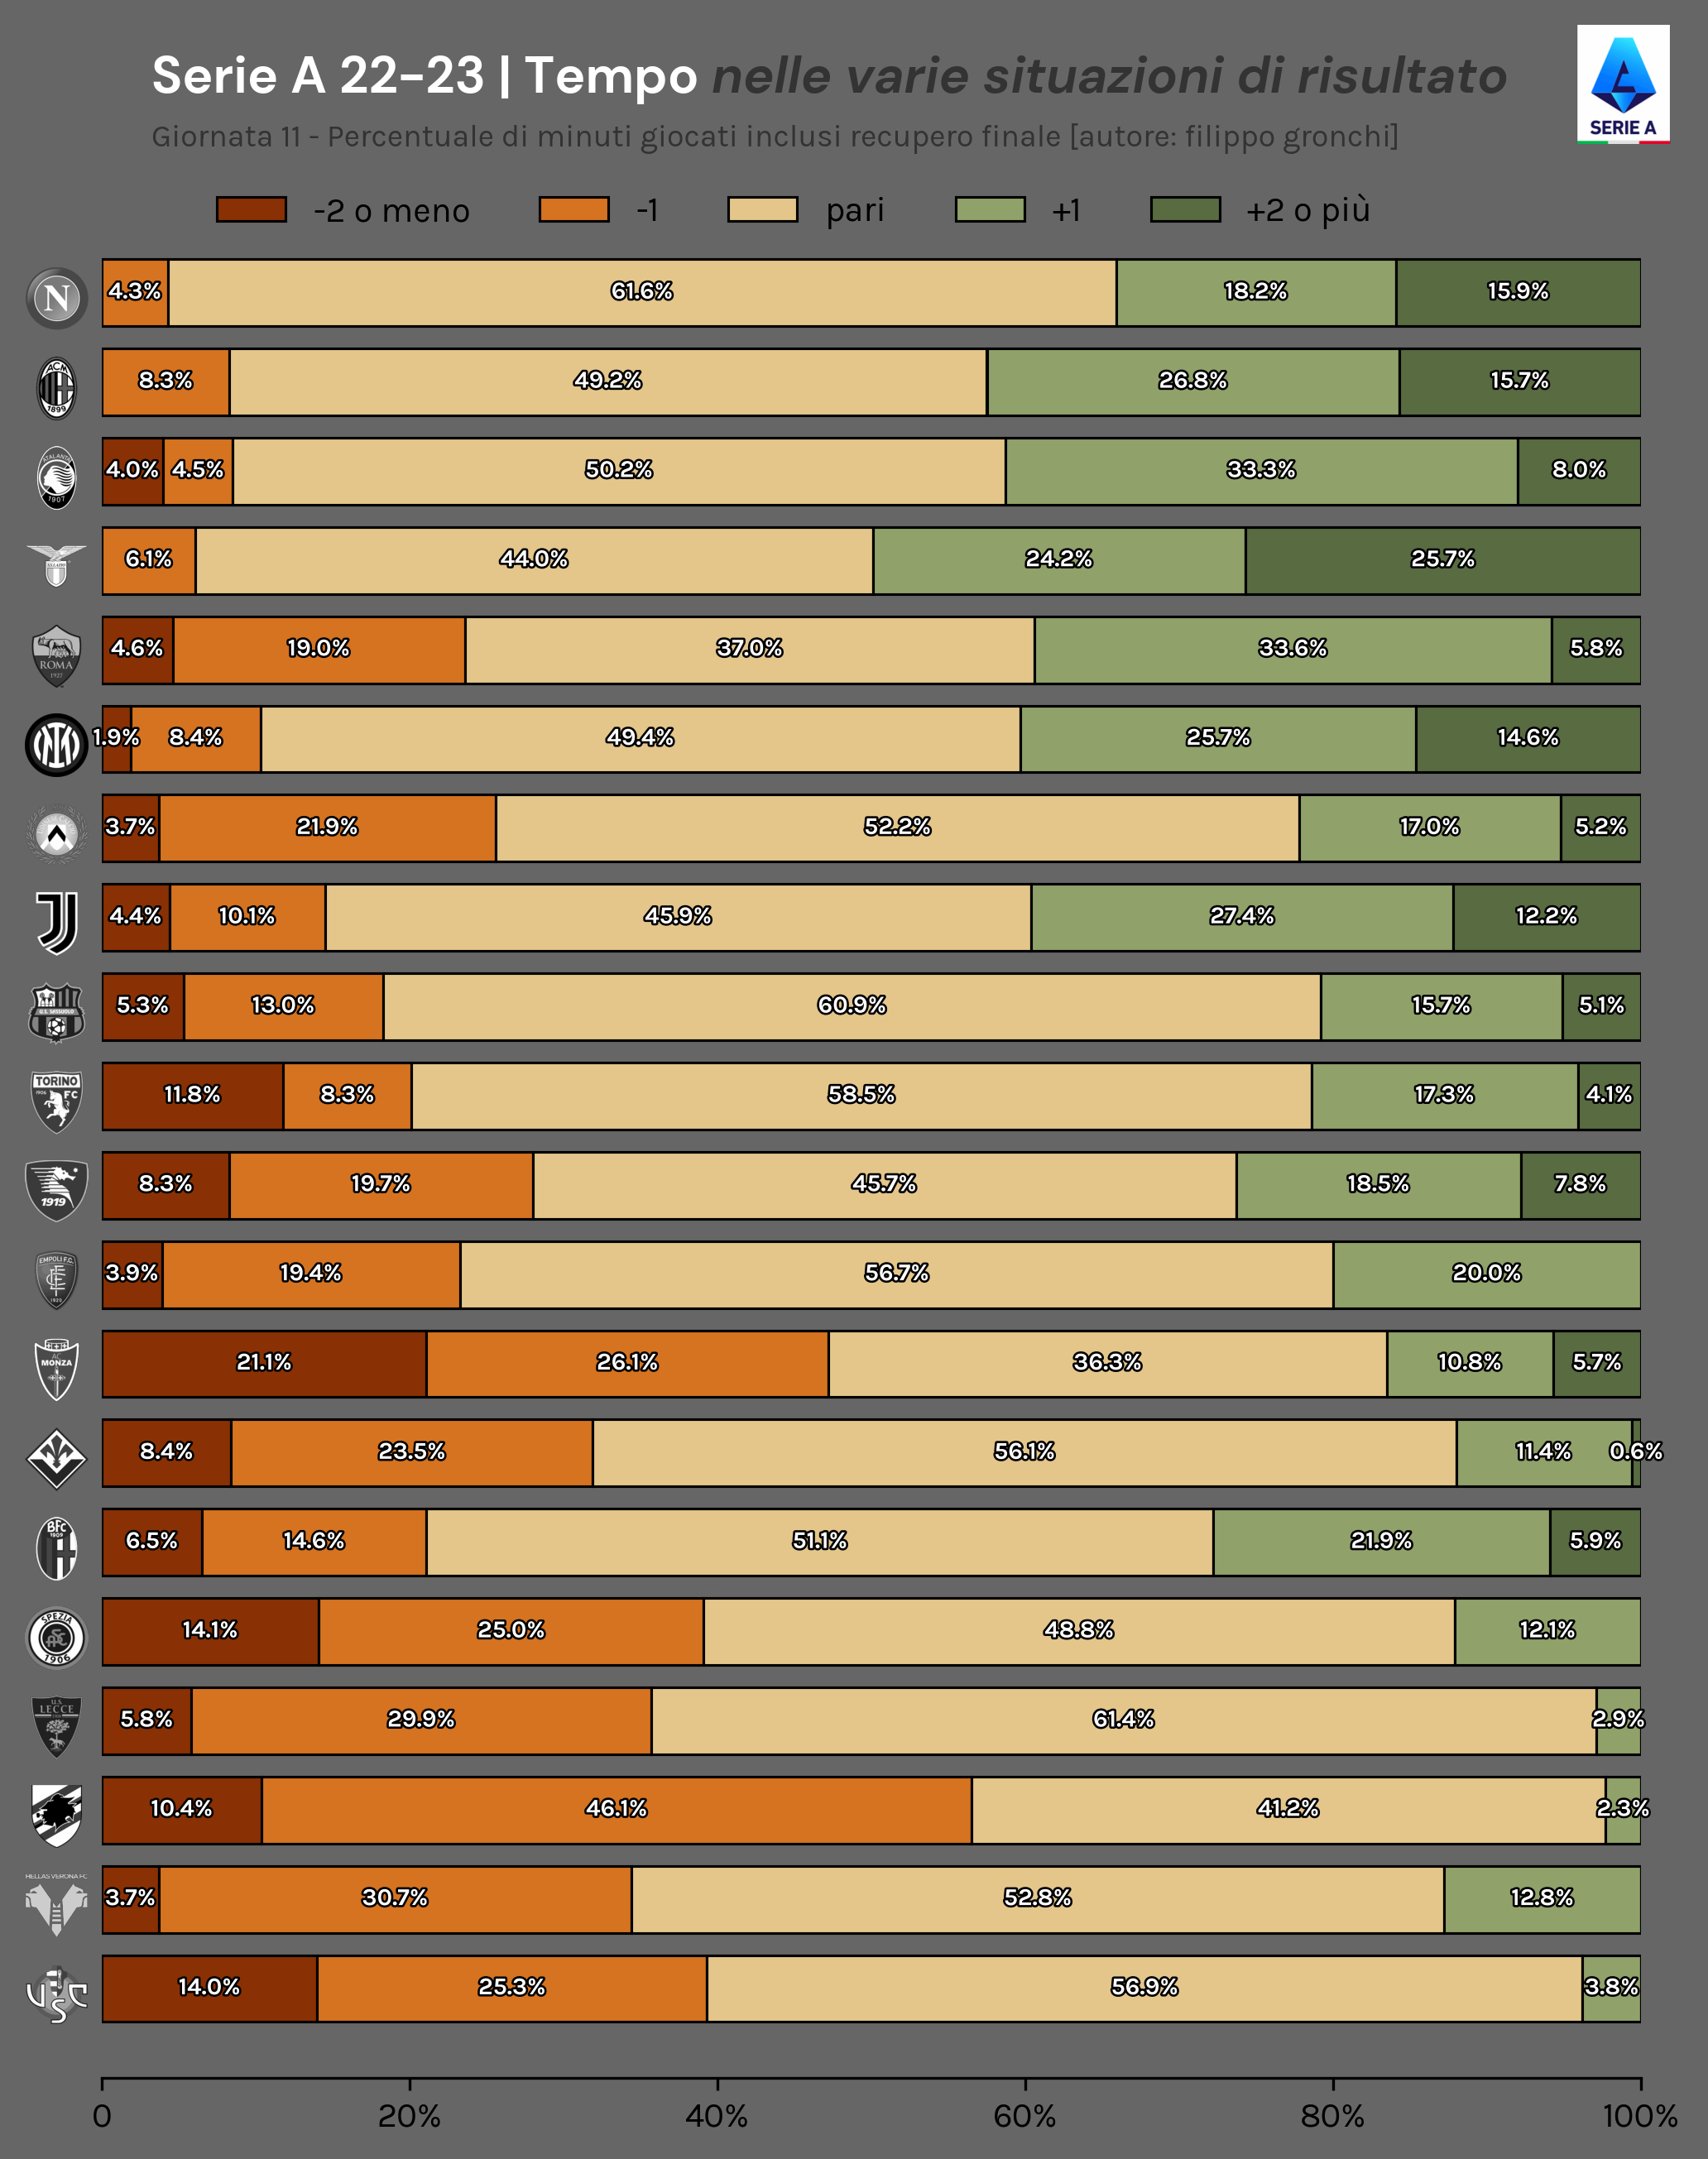

In [9]:
dataset = final_3.sort_values(by='punti', ascending=True).reset_index(drop=True)
sort_order = dataset["squadra"].to_list()
def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax


fig = plt.figure(figsize=(8,10), dpi=300, facecolor = "#666666")
ax = plt.subplot(facecolor = "#666666")
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
max_ = 1
ax.set_xlim(0, max_)
ax.set_ylim(-1, dataset.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.set_xlabel('(PSxG-GA)/PSxG', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
#norm = mcolors.Normalize(vmin=dataset['goal-xGOT'].min(),vmax=dataset['goal-xGOT'].max())
#cmap = plt.get_cmap('SOC')
height_meno2 = (
    dataset["meno2_perc"]
    .reset_index(drop = True)
)

height_meno1 = (
    dataset["meno1_perc"]
    .reset_index(drop = True)
)
height_zero = (
    dataset["zero_perc"]
    .reset_index(drop = True)
)

height_uno = (
    dataset["uno_perc"]
    .reset_index(drop = True)
)
height_due = (
    dataset["due_perc"]
    .reset_index(drop = True)
)

X = np.arange(len(height_meno2))
# -2
ax.barh(
    X, 
    height_meno2, 
    ec = "black",
    #hatch='//////',
    lw = .75, 
    color = "#893104", #"#d80000", 
    zorder = 3, 
    height = 0.75,
    label = "-2 o meno"
)

# -1
ax.barh(
    X, 
    height_meno1,
    left = height_meno2, # This creates the stacked chart
    #hatch='//////',
    ec = "black", 
    lw = .75, 
    color = "#d57321", #"#ea8526", 
    zorder = 3, 
    height = 0.75,
    label = "-1"
)
# 0
val2 = height_meno2+height_meno1
ax.barh(
    X, 
    height_zero, 
    left = val2,
    #hatch='//////',
    ec = "black", 
    lw = .75, 
    color = "#e4c68b", #"#e2e3a1", 
    zorder = 3, 
    height = 0.75,
    label = "pari"
)
# +1
val3 = height_meno2+height_meno1+height_zero
ax.barh(
    X, 
    height_uno,
    left = val3, # This creates the stacked chart
    #hatch='//////',
    ec = "black", 
    lw = .75, 
    color = "#90a16a", #"#329209", 
    zorder = 3, 
    height = 0.75,
    label = "+1"
)
# +2
val4 = height_meno2+height_meno1+height_zero+height_uno
ax.barh(
    X, 
    height_due,
    left = val4,
    ec = "black",
    #hatch='|||||||',
    lw = .75, 
    color = "#586b41", #"#235f08", 
    zorder = 3, 
    height = 0.75,
    label = "+2 o più"
)


# Annotate the bar chart
aux_counter = 0
for y_1, y_2, y_3, y_4, y_5 in zip(height_meno2, height_meno1, height_zero, height_uno, height_due):
    # annotate percentage of fouls in the center of the bar
    if (y_1!=0):
        meno2_text = ax.annotate(
            xy = (y_1/2, aux_counter),
            text = f"{y_1:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_2!=0):
        meno1_text = ax.annotate(
            xy = (y_1+y_2/2, aux_counter),
            text = f"{y_2:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_3!=0):
        zero_text = ax.annotate(
            xy = (y_1+y_2+y_3/2, aux_counter),
            text = f"{y_3:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_4!=0):
        uno_text = ax.annotate(
            xy = (y_1+y_2+y_3+y_4/2, aux_counter),
            text = f"{y_4:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_5!=0):
        due_text = ax.annotate(
            xy = (y_1+y_2+y_3+y_4+y_5/2, aux_counter),
            text = f"{y_5:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_1!=0):
        meno2_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    if (y_2!=0):
        meno1_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    if (y_3!=0):
        zero_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    if (y_4!=0):
        uno_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    if (y_5!=0):
        due_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    aux_counter += 1

# Adjust ticks
#yticks_ = ax.yaxis.set_ticks(
#    ticks = X,
#    labels = sort_order,
#    rotation = 0
#)
# -- Transformation functions
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
ax_coords = DC_to_NFC((0.95,20.5))
ax_size = 0.06
image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
)
league_id = 55
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{league_id:.0f}.png'))
image_ax.imshow(club_icon)
image_ax.axis('off')


DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
height = 0.75
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, team_id in enumerate(dataset["footId"]):
    ax_coords = DC_to_NFC([-0.05, index - 0.69*height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.032, 0.032], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert('LA')
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")

    #logo_ax.annotate(
    #    xy =(0, 0),
    #    text = f"({dataset['squadra'].iloc[index]})",
    #    xytext = (8, -22),
    #    textcoords = "offset points",
    #    size = 5,
    #    ha = "center",
    #    va = "center"
    #)

ax.set_xticks((0, 0.2, 0.4, 0.6, 0.8, 1))
ax.set_xticklabels(('0', '20%', '40%', '60%', '80%', '100%'))
#ax.set_axis_off()
ax.legend(
    ncol = 5, 
    loc = "upper center", 
    bbox_to_anchor = (0.45, 1.022),
    frameon = False
)

fig_text(
    x = 0.15, y = .92, 
    s = "Serie A 22-23 | Tempo <nelle varie situazioni di risultato>",
    highlight_textprops=[{"color":"#333333", "style":"italic"}],
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'white', font = 'DM Sans', weight = 'bold'
)

subTitle =  "Giornata 11 - Percentuale di minuti giocati inclusi recupero finale [autore: filippo gronchi]"
fig_text(
    x = 0.15, y = 0.9, 
    s = subTitle,
    va = 'bottom', ha = 'left',
    fontsize = 9, color = '#333333'
)

filenameStr = "../figures/SerieA_22_23_goal_spread_11.png"
plt.savefig(
	filenameStr,
	dpi = 600,
	facecolor = "#666666",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.show()